# This is a heart disease prediction project
### Using "Heart Disease Dataset | Cleaned" dataset to build a classification model to predict heart disease

Preprocess the dataset Include necessary data preprocessing steps, such as handling missing
values, encoding categorical variables, and scaling features.

Train and evaluate the following algorithms:
> - Logistic Regression
> - Decision Tree Classifier
> - Random Forest Classifier
> - Gradient Boosting Classifier
> - Support Vector Machine (SVM)

For each algorithm, calculate and compare the following metrics:
- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1 Score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# importing models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# import Evaluation Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

In [2]:
# Load the dataset
df_hd = pd.read_csv("heart_disease_cleaned.csv")

df_hd.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df_hd.shape

(919, 16)

In [4]:
# to know about in "num" column that how much 0,1,2,3,4 it contain
df_hd["num"].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

<Axes: xlabel='num'>

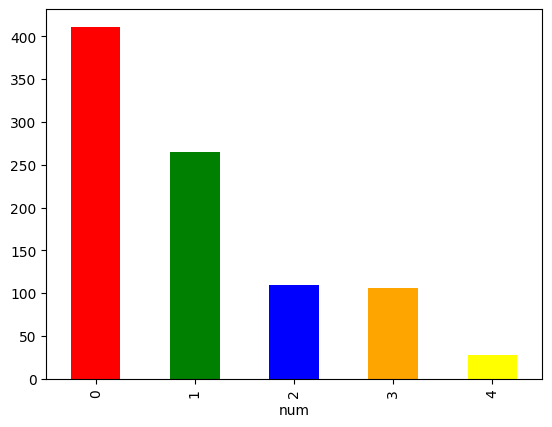

In [5]:
# for better result plot it
df_hd["num"].value_counts().plot(kind="bar", color=["red","green","blue","orange","yellow"])  

    > Red    (0) denotes "No Heart Disease.
    > Green  (1) denotes "Presence of Heart Disease with a certain severity"
    > Blue   (2) denotes "Presence of Heart Disease with a increased severity"
    > Orange (3) denotes "Presence of Heart Disease with a further increased severity"
    > Yellow (4) denotes "Presence of Heart Disease with a highiest severity"

In [6]:
# to know if are there any missing values
df_hd.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [7]:
df_hd.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,460.180631,53.509249,132.704853,200.791393,136.815734,0.973408,0.501632,0.993471
std,265.693391,9.429689,18.070335,109.213597,25.371260,1.120490,0.786423,1.141398
min,1.000000,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.500000,47.000000,120.000000,178.500000,120.000000,0.000000,0.000000,0.000000
50%,460.000000,54.000000,130.000000,224.000000,138.000000,0.800000,0.000000,1.000000
75%,689.500000,60.000000,141.210000,268.000000,156.000000,1.900000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [8]:
df_hd.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
# drop un-necessary columns
df_hd.drop(['id', 'dataset'], axis = 1, inplace = True)

In [10]:
df_hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.00,233.0,True,lv hypertrophy,150.00,False,2.300,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.00,286.0,False,lv hypertrophy,108.00,True,1.500,flat,3.0,normal,2
2,67,Male,asymptomatic,120.00,229.0,False,lv hypertrophy,129.00,True,2.600,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.00,250.0,False,normal,187.00,False,3.500,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.00,204.0,False,lv hypertrophy,172.00,False,1.400,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,54,Female,asymptomatic,127.00,333.0,True,st-t abnormality,154.00,False,0.000,flat,0.0,normal,1
915,62,Male,typical angina,143.06,139.0,False,st-t abnormality,119.94,True,2.042,flat,0.0,reversable defect,0
916,55,Male,asymptomatic,122.00,223.0,True,st-t abnormality,100.00,False,0.000,flat,1.0,fixed defect,2
917,58,Male,asymptomatic,150.81,385.0,True,lv hypertrophy,110.63,True,2.181,flat,0.0,reversable defect,0


In [11]:
# convert the following columns to numerical values
# sex cp fbs restecg exang slop thal 

# Sex Column
df_hd['sex'] = df_hd['sex'].map({'Male':1,'Female':0})
print(df_hd.head(6))

   age  sex               cp  trestbps   chol    fbs         restecg  thalch  \
0   63    1   typical angina     145.0  233.0   True  lv hypertrophy   150.0   
1   67    1     asymptomatic     160.0  286.0  False  lv hypertrophy   108.0   
2   67    1     asymptomatic     120.0  229.0  False  lv hypertrophy   129.0   
3   37    1      non-anginal     130.0  250.0  False          normal   187.0   
4   41    0  atypical angina     130.0  204.0  False  lv hypertrophy   172.0   
5   56    1  atypical angina     120.0  236.0  False          normal   178.0   

   exang  oldpeak        slope   ca               thal  num  
0  False      2.3  downsloping  0.0       fixed defect    0  
1   True      1.5         flat  3.0             normal    2  
2   True      2.6         flat  2.0  reversable defect    1  
3  False      3.5  downsloping  0.0             normal    0  
4  False      1.4    upsloping  0.0             normal    0  
5  False      0.8    upsloping  0.0             normal    0  


In [12]:
# Chest Pain (cp) Column
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'cp' column
df_hd['cp'] = label_encoder.fit_transform(df_hd['cp'])

# Verify the conversion
print(df_hd['cp'].head())

0    3
1    0
2    0
3    2
4    1
Name: cp, dtype: int32


 #### cp: chest pain type
        Value 0: typical angina-- Actual Chest Pain: Chest pain due to decreased blood pressure
        Value 1: atypical angina -- Chest pain not related to the Heart Problem
        Value 2: non-anginal pain -- Not heart-related
        Value 3: asymptomatic -- Chest pain not showing heart problem

In [13]:
# fbs column

# Convert the 'fbs' column to integers, in which 1 for True and 0 for False
df_hd['fbs'] = df_hd['fbs'].astype(int)

# Verify the conversion
print(df_hd['fbs'].head())

0    1
1    0
2    0
3    0
4    0
Name: fbs, dtype: int32


In [14]:
# restecg Column
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le_restecg = LabelEncoder()

# Fit and transform the 'restecg' column
df_hd['restecg'] = le_restecg.fit_transform(df_hd['restecg'])

# Verify the conversion
print(df_hd['restecg'].head())

0    0
1    0
2    0
3    1
4    0
Name: restecg, dtype: int32


 #### restecg coumn
        0: lv hypertrophy
        1: normal 
        2: st-t abnormality

In [15]:
df_hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.00,233.0,1,0,150.00,False,2.300,downsloping,0.0,fixed defect,0
1,67,1,0,160.00,286.0,0,0,108.00,True,1.500,flat,3.0,normal,2
2,67,1,0,120.00,229.0,0,0,129.00,True,2.600,flat,2.0,reversable defect,1
3,37,1,2,130.00,250.0,0,1,187.00,False,3.500,downsloping,0.0,normal,0
4,41,0,1,130.00,204.0,0,0,172.00,False,1.400,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,54,0,0,127.00,333.0,1,2,154.00,False,0.000,flat,0.0,normal,1
915,62,1,3,143.06,139.0,0,2,119.94,True,2.042,flat,0.0,reversable defect,0
916,55,1,0,122.00,223.0,1,2,100.00,False,0.000,flat,1.0,fixed defect,2
917,58,1,0,150.81,385.0,1,0,110.63,True,2.181,flat,0.0,reversable defect,0


In [16]:
# exang column

# Convert the 'exang' column to integers, in which 1 for True and 0 for False
df_hd['exang'] = df_hd['exang'].astype(int)

# Verify the conversion
print(df_hd['exang'].head())

0    0
1    1
2    1
3    0
4    0
Name: exang, dtype: int32


In [17]:
# slope Column
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le_slope = LabelEncoder()

# Fit and transform the 'slope' column
df_hd['slope'] = le_slope.fit_transform(df_hd['slope'])

# Verify the conversion
print(df_hd['slope'].head())

0    0
1    1
2    1
3    0
4    2
Name: slope, dtype: int32


 #### slop column
        0: downsloping
        1: flat
        2: upsloping

In [18]:
# thal Column
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le_thal = LabelEncoder()

# Fit and transform the 'thal' column
df_hd['thal'] = le_thal.fit_transform(df_hd['thal'])

# Verify the conversion
print(df_hd['thal'].head())

0    0
1    1
2    2
3    1
4    1
Name: thal, dtype: int32


 #### thal column
        0: fixed defect
        1: normal
        2: reversable defect

In [19]:
df_hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.00,233.0,1,0,150.00,0,2.300,0,0.0,0,0
1,67,1,0,160.00,286.0,0,0,108.00,1,1.500,1,3.0,1,2
2,67,1,0,120.00,229.0,0,0,129.00,1,2.600,1,2.0,2,1
3,37,1,2,130.00,250.0,0,1,187.00,0,3.500,0,0.0,1,0
4,41,0,1,130.00,204.0,0,0,172.00,0,1.400,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,54,0,0,127.00,333.0,1,2,154.00,0,0.000,1,0.0,1,1
915,62,1,3,143.06,139.0,0,2,119.94,1,2.042,1,0.0,2,0
916,55,1,0,122.00,223.0,1,2,100.00,0,0.000,1,1.0,0,2
917,58,1,0,150.81,385.0,1,0,110.63,1,2.181,1,0.0,2,0


### Modelling

In [20]:
# Split the dataset to be used in the models

# Create matrix of features
x = df_hd.drop('num', axis = 1) 

# Create target variable
y = df_hd['num'] # y is the column we're trying to predict


In [21]:
# using Random Seed, so that others could produce the same result
np.random.seed(7)

# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### The models we are going to use
> 1. Logistic Regression
> 2. Decision Tree Classifier
> 3. Random Forest Classifier
> 4. Gradient Boosting Classifier 
> 5. Support Vector Machine (SVM)

## 1. LOGISTIC REGRESSION

### Model Training

In [22]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression Model')
print("--"*15)
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression Model
------------------------------


c:\Users\ii\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

In [23]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*10)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
--------------------
Accuracy 58.15 %


Precision: 0.34
Recall: 0.33
F1 Score: 0.32
--------------------
[[72  8  0  1  0]
 [25 31  0  2  1]
 [ 3 12  1  3  0]
 [ 1 10  3  3  0]
 [ 0  5  0  3  0]]


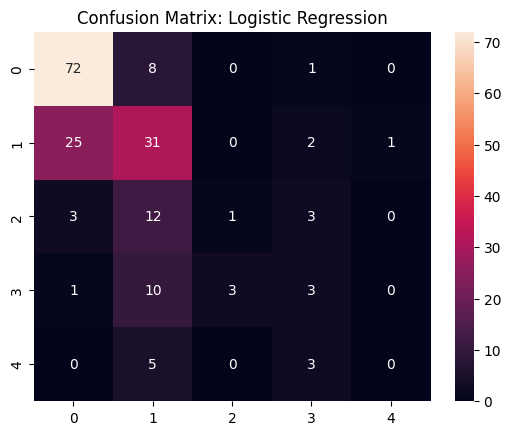

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate precision, recall, and F1 score
precision_lr = precision_score(y_test, y_pred_log_reg, average='macro')
recall_lr = recall_score(y_test, y_pred_log_reg, average='macro')
f1_lr = f1_score(y_test, y_pred_log_reg, average='macro')

# Print the results
print(f'Precision: {precision_lr:.2f}')
print(f'Recall: {recall_lr:.2f}')
print(f'F1 Score: {f1_lr:.2f}')
print("--" * 10)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)

# Print confusion matrix
print(confusion)

# Plot confusion matrix using seaborn
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

## 2. Decision Tree

### Model Training

In [25]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
dtree = DecisionTreeClassifier()

# Pass training data into model
dtree.fit(x_train, y_train)

Decision Tree Classifier


DecisionTreeClassifier()

### Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_dtree = dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*13)
dtree_accuracy = round(accuracy_score(y_test, y_pred_dtree) * 100,2)
print('Accuracy', dtree_accuracy,'%')

Decision Tree Classifier
--------------------------
Accuracy 54.89 %


Precision: 0.34
Recall: 0.35
F1 Score: 0.34
--------------------
[[64 11  4  2  0]
 [16 28 10  5  0]
 [ 0  7  5  6  1]
 [ 0  4  8  4  1]
 [ 0  2  2  4  0]]


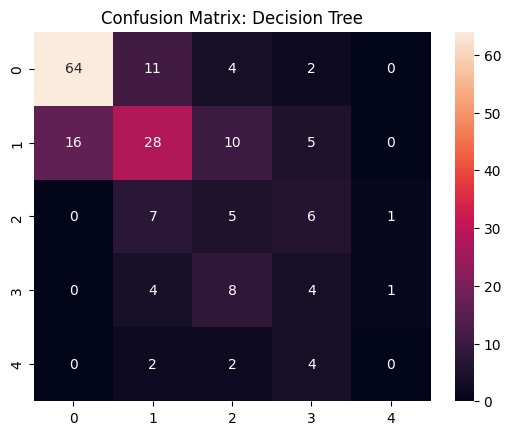

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate precision, recall, and F1 score
precision_dt = precision_score(y_test, y_pred_dtree, average='macro')
recall_dt = recall_score(y_test, y_pred_dtree, average='macro')
f1_dt = f1_score(y_test, y_pred_dtree, average='macro')
dtree_accuracy = round(accuracy_score(y_test, y_pred_dtree) * 100,2)

# Print the results
print(f'Precision: {precision_dt:.2f}')
print(f'Recall: {recall_dt:.2f}')
print(f'F1 Score: {f1_dt:.2f}')
print("--" * 10)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_dtree)

# Print confusion matrix
print(confusion)

# Plot confusion matrix using seaborn
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion Matrix: Decision Tree')
plt.show()

## 3. Random Forest

### Model Training

In [28]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rf_clsfr = RandomForestClassifier()

# Pass training data into model
rf_clsfr.fit(x_train, y_train)

Random Forest Classifier


RandomForestClassifier()

### Model Evaluation

In [29]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rf_clsfr.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*13)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
--------------------------
Accuracy 65.22 %


Precision: 0.43
Recall: 0.43
F1 Score: 0.43
--------------------
[[74  6  1  0  0]
 [20 34  4  1  0]
 [ 2  7  6  4  0]
 [ 1  6  4  6  0]
 [ 1  3  1  3  0]]


c:\Users\ii\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


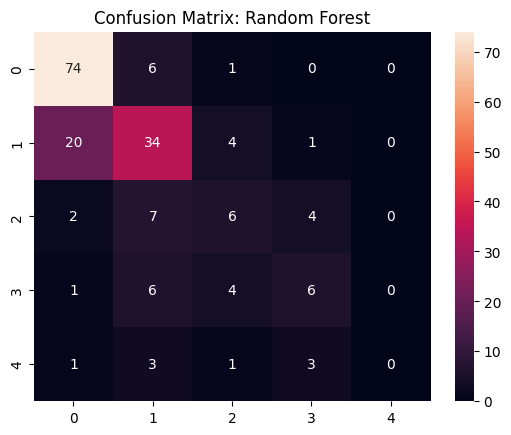

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate precision, recall, and F1 score
precision_rf = precision_score(y_test, y_pred_rfc, average='macro')
recall_rf = recall_score(y_test, y_pred_rfc, average='macro')
f1_rf = f1_score(y_test, y_pred_rfc, average='macro')


# Print the results
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1 Score: {f1_rf:.2f}')
print("--" * 10)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)

# Print confusion matrix
print(confusion)

# Plot confusion matrix using seaborn
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion Matrix: Random Forest')
plt.show()

## 4. Gradient Bossting Classifier

### Model Training

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting Classifier')
# Create instance of model
gb_clsfr = GradientBoostingClassifier()

# Pass training data into model
gb_clsfr.fit(x_train, y_train)

Gradient Boosting Classifier


GradientBoostingClassifier()

### Model Evaluation

In [32]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_gbc = gb_clsfr.predict(x_test)
# Score It

print('Gradient Boosting Classifier')
# Accuracy
print('--'*15)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc) * 100,2)
print('Accuracy', gbc_accuracy,'%')

Gradient Boosting Classifier
------------------------------
Accuracy 59.78 %


Precision: 0.35
Recall: 0.36
F1 Score: 0.35
--------------------
[[71  8  1  1  0]
 [18 32  8  1  0]
 [ 0  9  4  5  1]
 [ 1  6  6  3  1]
 [ 0  1  1  6  0]]


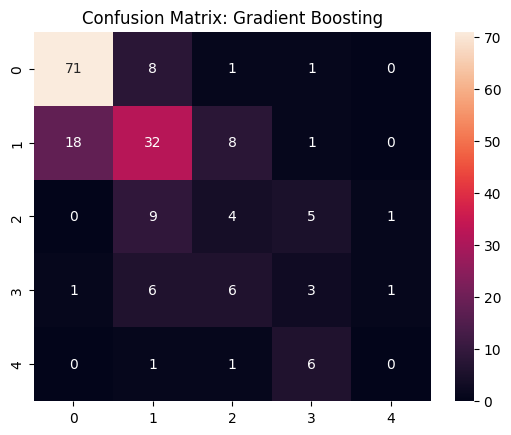

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate precision, recall, and F1 score
precision_gb = precision_score(y_test, y_pred_gbc, average='macro')
recall_gb = recall_score(y_test, y_pred_gbc, average='macro')
f1_gb = f1_score(y_test, y_pred_gbc, average='macro')


# Print the results
print(f'Precision: {precision_gb:.2f}')
print(f'Recall: {recall_gb:.2f}')
print(f'F1 Score: {f1_gb:.2f}')
print("--" * 10)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_gbc)

# Print confusion matrix
print(confusion)

# Plot confusion matrix using seaborn
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion Matrix: Gradient Boosting')
plt.show()

## 5. Support Vector Machine (SVM)

### Model Training

In [34]:
from sklearn.svm import SVC

print('Support Vector Machine (SVM)')
# Create instance of model
svm = SVC()

# Pass training data into model
svm.fit(x_train, y_train)

Support Vector Machine (SVM)


SVC()

### Model Evaluation

In [35]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_svm = svm.predict(x_test)
# Score It

print('Support Vector Machine (SVM)')
# Accuracy
print('--'*15)
svm_accuracy = round(accuracy_score(y_test, y_pred_svm) * 100,2)
print('Accuracy', svm_accuracy,'%')

Support Vector Machine (SVM)
------------------------------
Accuracy 48.91 %


Precision: 0.18
Recall: 0.23
F1 Score: 0.19
--------------------
[[78  3  0  0  0]
 [47 12  0  0  0]
 [10  9  0  0  0]
 [10  7  0  0  0]
 [ 8  0  0  0  0]]


c:\Users\ii\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


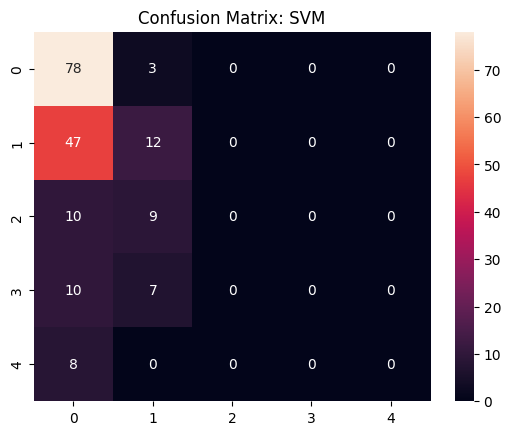

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate precision, recall, and F1 score
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')


# Print the results
print(f'Precision: {precision_svm:.2f}')
print(f'Recall: {recall_svm:.2f}')
print(f'F1 Score: {f1_svm:.2f}')
print("--" * 10)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_svm)

# Print confusion matrix
print(confusion)

# Plot confusion matrix using seaborn
sns.heatmap(confusion, annot=True, fmt="d")
plt.title('Confusion Matrix: SVM')
plt.show()

In [37]:
# Sample model scores (replace these with actual model scores)
model_scores = {
    "Logistic Regression": log_reg_accuracy,
    "Decision Tree Classifier": dtree_accuracy,
    "Random Forest Classifier": rfc_accuracy,
    "Gradient Boosting Classifier": gbc_accuracy,
    "Support Vector Machine(SVM)": svm_accuracy
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
print("--" * 22)
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")


Model Rankings (Greater Values are better):
--------------------------------------------
1. Random Forest Classifier: 65.22
2. Gradient Boosting Classifier: 59.78
3. Logistic Regression: 58.15
4. Decision Tree Classifier: 54.89
5. Support Vector Machine(SVM): 48.91


In [38]:
accuracy_scores = [log_reg_accuracy, dtree_accuracy, rfc_accuracy, gbc_accuracy, svm_accuracy]
precision_scores = [precision_lr, precision_dt, precision_rf, precision_gb, precision_svm]
recall_scores = [recall_lr, recall_dt, recall_rf, recall_gb, recall_svm]
f1_scores = [f1_lr, f1_dt, f1_rf, f1_gb, f1_svm]

# Calculate the means of accuracy,precision,recall and f1
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Mean Precision: {mean_precision:.2f}")
print(f"Mean Recall: {mean_recall:.2f}")
print(f"Mean F1: {mean_f1:.2f}")

Mean Accuracy: 57.39
Mean Precision: 0.33
Mean Recall: 0.34
Mean F1: 0.33


<Axes: title={'center': 'Comparison of the Matrices'}>

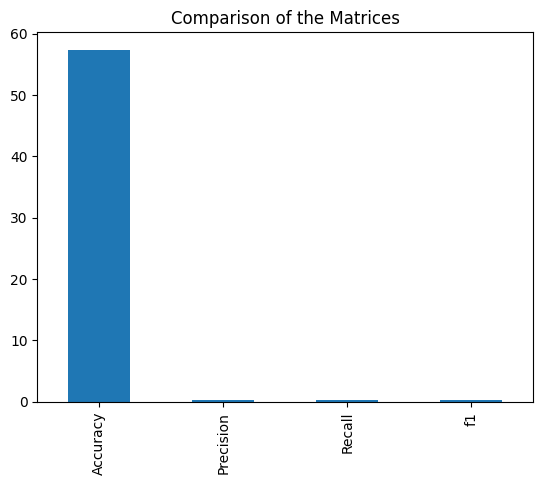

In [39]:
cv_plot = pd.DataFrame({
    "Accuracy" :mean_accuracy,
    "Precision" :mean_precision,
    "Recall" :mean_recall,
    "f1" :mean_f1
},index=[0])
cv_plot.T.plot.bar(title="Comparison of the Matrices",
                 legend=False)

## Features Improving 

In [40]:
df_hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.00,233.0,1,0,150.00,0,2.300,0,0.0,0,0
1,67,1,0,160.00,286.0,0,0,108.00,1,1.500,1,3.0,1,2
2,67,1,0,120.00,229.0,0,0,129.00,1,2.600,1,2.0,2,1
3,37,1,2,130.00,250.0,0,1,187.00,0,3.500,0,0.0,1,0
4,41,0,1,130.00,204.0,0,0,172.00,0,1.400,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,54,0,0,127.00,333.0,1,2,154.00,0,0.000,1,0.0,1,1
915,62,1,3,143.06,139.0,0,2,119.94,1,2.042,1,0.0,2,0
916,55,1,0,122.00,223.0,1,2,100.00,0,0.000,1,1.0,0,2
917,58,1,0,150.81,385.0,1,0,110.63,1,2.181,1,0.0,2,0


In [41]:
# Check Coeffecient
log_reg.fit(x_train,y_train)
log_reg.coef_

c:\Users\ii\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-3.07475753e-02, -1.84080659e-01,  5.25152376e-01,
         6.96086232e-03,  3.71403998e-03, -4.40389041e-02,
         2.47957874e-02,  1.38048146e-02, -3.00502915e-01,
        -6.17715385e-01,  2.75349523e-01, -5.03474530e-01,
        -1.24594366e-01],
       [-3.28327343e-02,  1.02524724e-01, -2.73979975e-01,
         9.13925155e-03,  7.27484729e-04, -1.70399277e-02,
         2.63912820e-02,  1.18774078e-02,  1.59223824e-01,
        -3.84670139e-03, -1.31644720e-01, -1.10230469e-01,
         1.30527529e-01],
       [-4.43691866e-02,  3.44855626e-02, -1.44587227e-01,
         1.87500202e-02, -3.07499610e-03,  1.92005076e-02,
         1.04142904e-03,  4.57565186e-03,  4.75030071e-02,
         1.59730748e-01, -4.17893121e-02,  2.16236155e-01,
        -5.75959282e-02],
       [ 3.57852480e-03,  4.16654559e-02, -7.91215443e-02,
         1.55953311e-02, -1.88289139e-03,  4.98822629e-02,
        -1.60231429e-02, -2.04167357e-02,  9.49122146e-02,
         3.15509122e-01, -5.26587255e

In [42]:
final_coef = dict(zip(df_hd.columns,list(log_reg.coef_[0])))
final_coef

{'age': -0.030747575273435808,
 'sex': -0.18408065883130825,
 'cp': 0.5251523759315996,
 'trestbps': 0.0069608623159167155,
 'chol': 0.003714039977631772,
 'fbs': -0.04403890414562976,
 'restecg': 0.02479578735442314,
 'thalch': 0.013804814599883392,
 'exang': -0.30050291543374863,
 'oldpeak': -0.6177153848276515,
 'slope': 0.2753495226589113,
 'ca': -0.5034745296092573,
 'thal': -0.12459436590023648}

<Axes: title={'center': 'Features Importance'}>

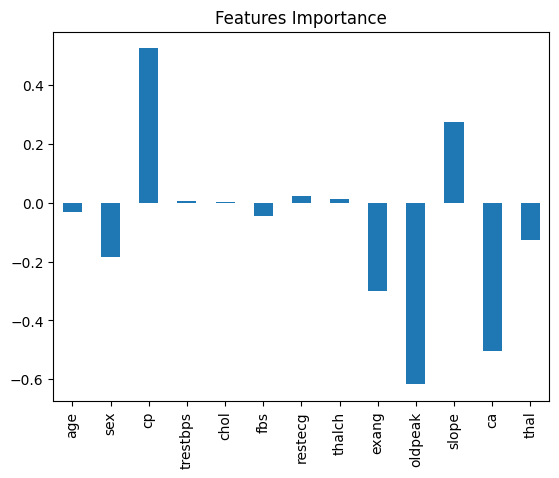

In [43]:
features = pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title="Features Importance", legend=False)

### Difirence Between Corelation Matrix VS Coefficient Matrix
> 1. Corelation Matrix: Compares each feature against each feature (VS all)
> 2. Coefficient Marix: Compares each feature against the target (VS target)


## Conclusion

### We set 95% accuracy goal, if, we did not meet
#### We can ask some Question
* what if we try to get more data
* what if we try to improve the quality of the data
* what if we try to use other models and see if there is any improvements